# R.M.S. TITANIC CASE STUDY

### [1. Read the data](#Read-the-data)

### [2. Exploratory Data Analysis & Data Cleaning](#Exploratory-Data-Analysis-&-Data-Cleaning)
#### [----- 2.1 Data profile report](#Data-profile-report)
#### [----- 2.2 Missing value treatment](#Missing-value-treatment)
#### [----- 2.3 Feature engineering](#Feature-engineering)
#### [----- 2.4 Data preprocessing](#Data-preprocessing)

### [3. Train Test Split](#Train-Test-Split)

### [4. Build Machine Learning models for cross validation](#Build-Machine-Learning-models-for-cross-validation)
#### [----- 4.1 Check cross validation score](#Check-cross-validation-score)
#### [----- 4.2 Feature importance](#Feature-importance)

### [5. Model Performance Metrics(Before tuning)](#Model-Performance-Metrics(Before-tuning))

### [6. Hyperparameter tuning](#Hyperparameter-Tuning)
#### [----- 6.1 Fit the model with best parameters](#Fit-the-model-with-best-parameters)

### [7. Model Performance Metrics(After tuning)](#Model-Performance-Metrics(After-tuning))

### [8. Summary](#Summary)

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

### Read the data

In [2]:
titanic = pd.read_csv('D:/IMS Proschool/Business Analytics/Project/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Exploratory Data Analysis & Data Cleaning

In [4]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hegarty, Miss. Hanora ""Nora""",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Data profile report

In [6]:
titanic.profile_report()

#### Missing value treatment

In [7]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Find the percentage of missing data per column

total = titanic.isna().sum().sort_values(ascending=False)
perc = titanic.isna().sum()/titanic.isna().count()*100
percent = (round(perc, 2)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])

In [9]:
missing_data.head()

,Total,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00


In [3]:
# calculate mean and standard deviation of Age to impute missing values
mean_age = titanic.Age.mean()
std_age = titanic.Age.std()
total_null = titanic.Age.isna().sum()

In [4]:
# compute random numbers between the mean and std, with size as total null values
random_age = np.random.randint(mean_age - std_age, mean_age + std_age, size = total_null)

In [5]:
# fill NA values in Age column with random values generated
age_temp = titanic['Age'].copy()
age_temp[np.isnan(age_temp)] = random_age
titanic['Age'] = age_temp

In [6]:
# convert data type of age to int
#titanic['Age'] = titanic['Age'].astype(int)

In [7]:
titanic.Embarked.mode()

0    S
dtype: object

In [6]:
# fill NA values in column Embarked with mode
titanic.Embarked.fillna(titanic.Embarked.mode()[0], inplace=True)

#### Feature engineering

In [7]:
#drop PassengerId because it has all unique values
#drop Ticket since it has 76% distinct values, and it will not have much effect on the result
#drop Cabin as it has 77% missing values, and imputing so many missing values does not make sense

titanic = titanic.drop(['PassengerId','Ticket','Cabin'], axis=1)

In [8]:
#check there are no missing values in the data
titanic.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
# convert data type of Fare to int
#titanic['Fare'] = titanic['Fare'].astype(int)

In [9]:
#extract titles from the column 'Name' and assign it to a new categorical column named 'Title'

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Misc": 5}

# extract titles
titanic['Title'] = titanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# replace titles with Misc
titanic['Title'] = titanic['Title'].replace(['Dr','Rev','Major','Col','Lady','Jonkheer','Don','Countess','Capt','Sir'], 'Misc')

# Mlle is short for Mademoiselle, a title given to unmarried woman, replace it with Miss
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')

# Ms is short for Miss
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')

# Mme is short for Madame, replace it with Mrs
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

In [10]:
#check values of Title columns

titanic['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Misc       23
Name: Title, dtype: int64

In [11]:
# drop the column Name as we have extracted the titles from it

titanic = titanic.drop(['Name'], axis=1)

#### We have imputed the missing values in Age at random. Now we have to make sure that passengers with Title 'Master' have Age less than 18 and passengers with Title 'Mr', 'Mrs' & 'Misc' have Age more than 18. This will help us improve our prediction model.

In [12]:
# check the data with Title as Master and Age more than 18
print(titanic[(titanic['Title']=='Master') & (titanic['Age']>17)])

     Survived  Pclass   Sex   Age  SibSp  Parch     Fare Embarked   Title
65          1       3  male  21.0      1      1  15.2458        C  Master
159         0       3  male  43.0      8      2  69.5500        S  Master
176         0       3  male  23.0      3      1  25.4667        S  Master
709         1       3  male  26.0      1      1  15.2458        C  Master


In [13]:
# check the data with Title as Mrs and Age less than 18
print(titanic[(titanic['Title']=='Mrs') & (titanic['Age']<18)])

     Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked Title
9           1       2  female  14.0      1      0   30.0708        C   Mrs
307         1       1  female  17.0      1      0  108.9000        C   Mrs
367         1       3  female  17.0      0      0    7.2292        C   Mrs
415         0       3  female  17.0      0      0    8.0500        S   Mrs
781         1       1  female  17.0      1      0   57.0000        S   Mrs
830         1       3  female  15.0      1      0   14.4542        C   Mrs


In [14]:
# check the data with Title as Mr and Age less than 18
print(titanic[(titanic['Title']=='Mr') & (titanic['Age']<18)])

     Survived  Pclass   Sex   Age  SibSp  Parch      Fare Embarked Title
86          0       3  male  16.0      1      3   34.3750        S    Mr
107         1       3  male  16.0      0      0    7.7750        S    Mr
138         0       3  male  16.0      0      0    9.2167        S    Mr
163         0       3  male  17.0      0      0    8.6625        S    Mr
181         0       2  male  17.0      0      0   15.0500        C    Mr
220         1       3  male  16.0      0      0    8.0500        S    Mr
266         0       3  male  16.0      4      1   39.6875        S    Mr
282         0       3  male  16.0      0      0    9.5000        S    Mr
333         0       3  male  16.0      2      0   18.0000        S    Mr
352         0       3  male  15.0      1      1    7.2292        C    Mr
384         0       3  male  17.0      0      0    7.8958        S    Mr
410         0       3  male  16.0      0      0    7.8958        S    Mr
433         0       3  male  17.0      0      0    

In [15]:
# check the data with Title as Misc and Age less than 18
print(titanic[(titanic['Title']=='Misc') & (titanic['Age']<18)])

Empty DataFrame
Columns: [Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Title]
Index: []


In [16]:
# Let us separate our data on the basis of Titles:

Master_df1 = titanic[(titanic['Title']=='Master') & (titanic['Age']>17)]
Mrs_df1 = titanic[(titanic['Title']=='Mrs') & (titanic['Age']<18)]
Mr_df1 = titanic[(titanic['Title']=='Mr') & (titanic['Age']<18)]
Misc_df = titanic[titanic['Title']=='Misc']
Miss_df = titanic[titanic['Title']=='Miss']

In [17]:
# And the remaining data:

Master_df2 = titanic[(titanic['Title']=='Master') & (titanic['Age']<=17)]
Mrs_df2 = titanic[(titanic['Title']=='Mrs') & (titanic['Age']>=18)]
Mr_df2 = titanic[(titanic['Title']=='Mr') & (titanic['Age']>=18)]

In [18]:
# random numbers for respective Titles

Master_age = np.random.randint(1,18,size=len(Master_df1))
Mrs_age = np.random.randint(18, mean_age+std_age, size=len(Mrs_df1))
Mr_age = np.random.randint(18, mean_age+std_age, size=len(Mr_df1))

In [19]:
# impute

Master_df1['Age'] = Master_df1['Age'].replace([i for i in Master_df1['Age']],[j for j in Master_age])
Mrs_df1['Age'] = Mrs_df1['Age'].replace([a for a in Mrs_df1['Age']],[b for b in Mrs_age])
Mr_df1['Age'] = Mr_df1['Age'].replace([x for x in Mr_df1['Age']],[y for y in Mr_age])

In [20]:
# merge the dataframes

titanic = pd.concat([Master_df1, Mrs_df1, Mr_df1, Master_df2, Mrs_df2, Mr_df2, Misc_df, Miss_df], axis=0)
titanic = titanic.sort_index()
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [79]:
titanic.shape

(891, 9)

#### Let us recheck that passengers with Title 'Master' have Age less than 18 and passengers with Title 'Mr', 'Mrs' & 'Misc' have Age more than 18.

In [21]:
print(titanic[(titanic['Title']=='Master') & (titanic['Age']>17)])

Empty DataFrame
Columns: [Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Title]
Index: []


In [22]:
print(titanic[(titanic['Title']=='Mrs') & (titanic['Age']<18)])

Empty DataFrame
Columns: [Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Title]
Index: []


In [23]:
print(titanic[(titanic['Title']=='Mr') & (titanic['Age']<18)])

Empty DataFrame
Columns: [Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Title]
Index: []


In [24]:
print(titanic[(titanic['Title']=='Misc') & (titanic['Age']<18)])

Empty DataFrame
Columns: [Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Title]
Index: []


#### Let's start plotting the analysis

In [25]:
#create a copy
titanic_df = titanic.copy()

titanic_df['Survived'] = titanic_df['Survived'].replace({1:'Yes',0:'No'})

# seperate survived and did_not_survive passengers
survived = titanic_df[titanic_df['Survived']=='Yes']
did_not_survive = titanic_df[titanic_df['Survived']=='No']

In [26]:
num_cols = ['Age','SibSp','Parch','Fare']
cat_cols = ['Pclass','Sex','Embarked','Title']

In [27]:
labels = titanic_df['Survived'].value_counts().keys().tolist()
values = titanic_df['Survived'].value_counts().values.tolist()
trace = go.Pie(labels=labels, 
               values=values, 
               marker=dict(colors=['royalblue','lime'], line=dict(color='white', width=1.3)), 
               rotation=90,
               hoverinfo='label+value+text',
               hole=.5
              )
layout = go.Layout(dict(title='Passengers Survival Ratio',
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)"
                        )
                  )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [28]:
#function for pie plot of categorical columns
def plot_pie(column):
    trace1 = go.Pie(values  = survived[column].value_counts().values.tolist(),
                    labels  = survived[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Survived",
                    marker  = dict(line = dict(width = 2, color = "rgb(243,243,243)")),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = did_not_survive[column].value_counts().values.tolist(),
                    labels  = did_not_survive[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2, color = "rgb(243,243,243)")),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Didn't Survive" 
                   )
    layout = go.Layout(dict(title = column + " wise passenger survival ratio",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Passengers that Survived ",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Passengers that didn't Survive",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
    
#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

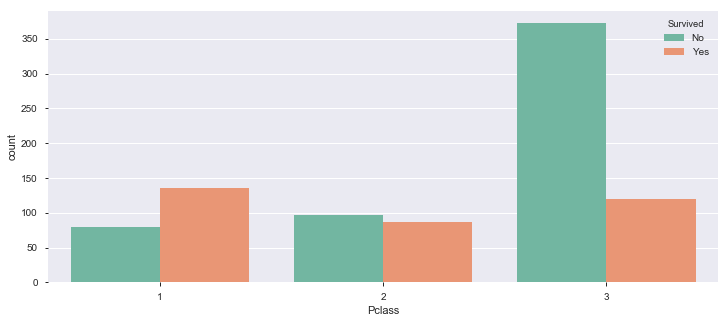

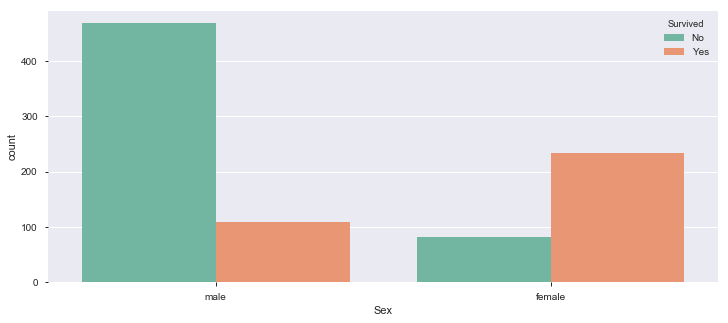

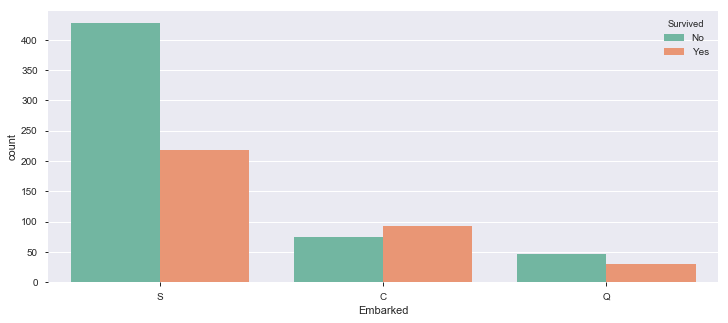

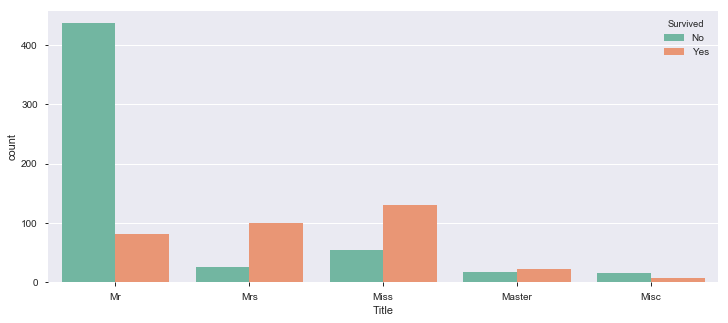

In [29]:
for x in cat_cols:
    plt.figure(figsize=(12,5))
    sns.countplot(x=x, hue='Survived',data = titanic_df, palette='Set2')
    plt.show()

In [30]:
#function for histogram of numeric columns
def histogram(column):
    trace1 = go.Histogram(x  = survived[column],
                          histnorm= "percent",
                          name = "Passengers that Survived",
                          marker = dict(line = dict(width = .5, color = "black")),
                          opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = did_not_survive[column],
                          histnorm = "percent",
                          name = "Passengers that didn't Survive",
                          marker = dict(line = dict(width = .5, color = "black")),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " wise passenger survival ratio",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                         ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "Percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                         ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    py.iplot(fig)
    
#for all numerical columns plot histogram    
for i in num_cols:
    histogram(i)

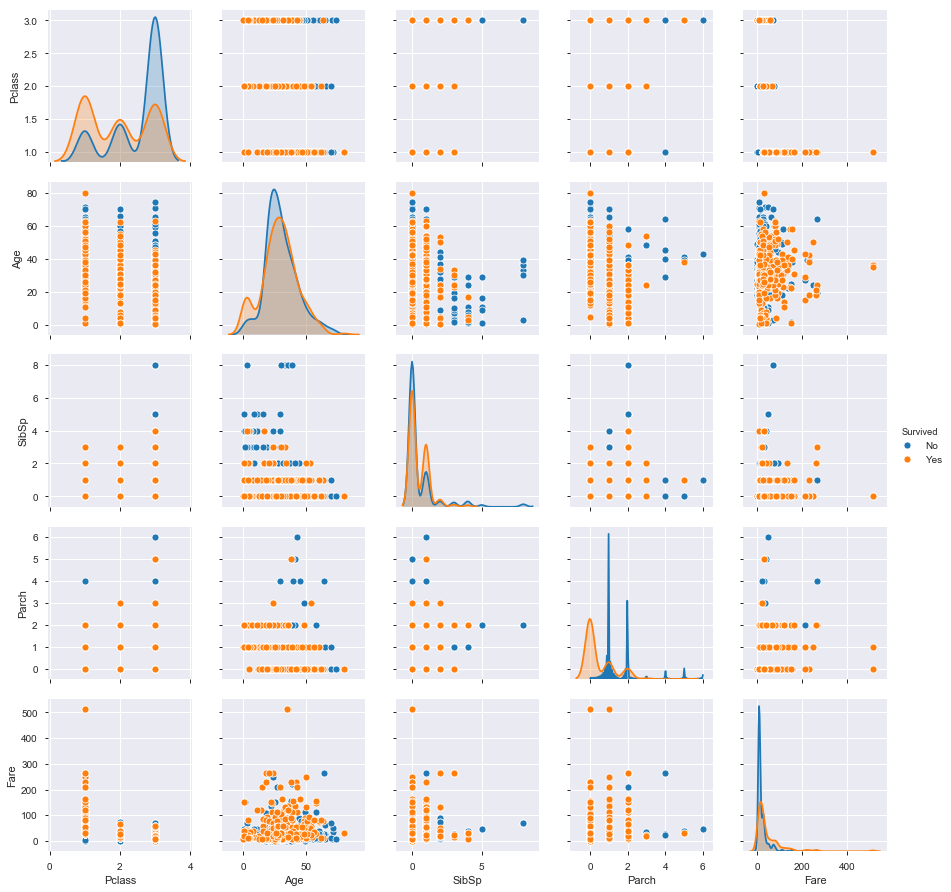

In [31]:
sns.pairplot(titanic_df, hue='Survived')
plt.show()

In [32]:
#correlation
correlation = titanic.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#### Data preprocessing

In [33]:
#check if the data is ready for transformation

titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
Title       891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [36]:
# all numerical columns

titanic_num = titanic[titanic.select_dtypes(include=[np.number]).columns.tolist()]
titanic_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [37]:
# target column

target_col = titanic_num['Survived']
titanic_num = titanic_num.drop(['Survived'], axis=1)

In [38]:
#Scaling Numerical columns

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scaled = std.fit_transform(titanic_num)
titanic_num_scaled = pd.DataFrame(scaled,columns=titanic_num.columns)
titanic_num_scaled.head()

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



,Pclass,Age,SibSp,Parch,Fare
0,0.827377,-0.595248,0.432793,-0.473674,-0.502445
1,-1.566107,0.608903,0.432793,-0.473674,0.786845
2,0.827377,-0.294210,-0.474545,-0.473674,-0.488854
3,-1.566107,0.383124,0.432793,-0.473674,0.420730
4,0.827377,0.383124,-0.474545,-0.473674,-0.486337


In [39]:
# create dummies for categorical data columns so that all the columns are numerical

titanic_cat = pd.get_dummies(titanic[titanic.select_dtypes(include='object').columns.tolist()])
titanic_cat.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,0,1,0,0,1,0,0,0,1,0
1,1,0,1,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,1,0,0
3,1,0,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,0,0,1,0


In [40]:
# merge all the numerical columns

titanic_com = pd.concat([titanic_num_scaled, titanic_cat], axis=1)
titanic_com.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,0.827377,-0.595248,0.432793,-0.473674,-0.502445,0,1,0,0,1,0,0,0,1,0
1,-1.566107,0.608903,0.432793,-0.473674,0.786845,1,0,1,0,0,0,0,0,0,1
2,0.827377,-0.294210,-0.474545,-0.473674,-0.488854,1,0,0,0,1,0,0,1,0,0
3,-1.566107,0.383124,0.432793,-0.473674,0.420730,1,0,0,0,1,0,0,0,0,1
4,0.827377,0.383124,-0.474545,-0.473674,-0.486337,0,1,0,0,1,0,0,0,1,0


In [41]:
titanic_com.shape

(891, 15)

### Train Test Split

In [42]:
# Assign the predictors and the target variable to X and y respectively

X = titanic_com
y = target_col

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

#### We wil use X_train and y_train for cross validation and check predictions of our selected model on X_test and y_test

### Build Machine Learning models for cross validation

In [44]:
# build ML models for cross validation

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [50]:
# create objects of the model classifiers

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=20)
nb = GaussianNB()

#### Check cross validation score

In [51]:
# check cross validation scores (accuracy) for all the models

from sklearn.model_selection import cross_val_score

lr_score = cross_val_score(lr, X_train, y_train, cv=4, scoring='accuracy')
dt_score = cross_val_score(dt, X_train, y_train, cv=4, scoring='accuracy')
rf_score = cross_val_score(rf, X_train, y_train, cv=4, scoring='accuracy')
knn_score = cross_val_score(knn, X_train, y_train, cv=4, scoring='accuracy')
nb_score = cross_val_score(nb, X_train, y_train, cv=4, scoring='accuracy')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [52]:
# print the scores

print('Logistic Regression: ',lr_score)
print('Decision Tree: ',dt_score)
print('Random Forest: ',rf_score)
print('K Nearest Neighbors: ',knn_score)
print('Naive Bayes: ',nb_score)

Logistic Regression:  [0.80446927 0.8258427  0.87078652 0.82485876]
Decision Tree:  [0.74860335 0.79775281 0.78089888 0.80225989]
Random Forest:  [0.7877095  0.78089888 0.84269663 0.85875706]
K Nearest Neighbors:  [0.79888268 0.83146067 0.84269663 0.83615819]
Naive Bayes:  [0.78212291 0.79213483 0.80898876 0.81920904]


In [53]:
#check the mean and standard deviation of the scores to select the best model

#mean
l = lr_score.mean()
d = dt_score.mean()
r = rf_score.mean()
k = knn_score.mean()
n = nb_score.mean()

# stdev
l_s = lr_score.std()
d_s = dt_score.std()
r_s = rf_score.std()
k_s = knn_score.std()
n_s = nb_score.std()

In [54]:
# print the results in a tabular form

res = pd.DataFrame(
        {
        'Model':['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbors','Naive Bayes'],
        'Accuracy':[l,d,r,k,n],
        'Stdev':[l_s, d_s, r_s, k_s, n_s]
        }   )
average_scores = res.sort_values(by='Accuracy', ascending=False)
average_scores

,Model,Accuracy,Stdev
0,Logistic Regression,0.831489,0.024239
3,K Nearest Neighbors,0.827300,0.016885
2,Random Forest,0.817516,0.033779
4,Naive Bayes,0.800614,0.014403
1,Decision Tree,0.782379,0.021063


#### As we can see that Logistic Regression has the best accuracy scores, we will select Logistic Regression Classifier for our problem

In [55]:
lr.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Feature importance

In [56]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc',
       'Title_Miss', 'Title_Mr', 'Title_Mrs'],
      dtype='object')

In [57]:
lr.coef_

array([[-0.92403714, -0.2703744 , -0.60449788, -0.17754399,  0.11793021,
         0.89565997, -0.72245859,  0.19918058,  0.18533873, -0.21131792,
         1.96631868, -0.91634371, -0.0487305 , -1.41530754,  0.58726446]])

In [58]:
lr.coef_[0]

array([-0.92403714, -0.2703744 , -0.60449788, -0.17754399,  0.11793021,
        0.89565997, -0.72245859,  0.19918058,  0.18533873, -0.21131792,
        1.96631868, -0.91634371, -0.0487305 , -1.41530754,  0.58726446])

In [59]:
lr.coef_.ravel()

array([-0.92403714, -0.2703744 , -0.60449788, -0.17754399,  0.11793021,
        0.89565997, -0.72245859,  0.19918058,  0.18533873, -0.21131792,
        1.96631868, -0.91634371, -0.0487305 , -1.41530754,  0.58726446])

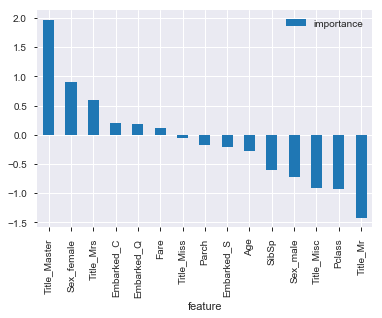

In [60]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':lr.coef_[0]})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

In [61]:
importances

,importance
feature,
Title_Master,1.966319
Sex_female,0.895660
Title_Mrs,0.587264
Embarked_C,0.199181
Embarked_Q,0.185339
Fare,0.117930
Title_Miss,-0.048731
Parch,-0.177544
Embarked_S,-0.211318


### Model Performance Metrics(Before tuning)

In [62]:
y_pred = lr.predict(X_test)

In [63]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       106
           1       0.79      0.67      0.73        73

   micro avg       0.79      0.79      0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [66]:
roc_score = roc_auc_score(y_test, y_pred)
roc_score = np.round(roc_score,4)
roc_score

0.7743

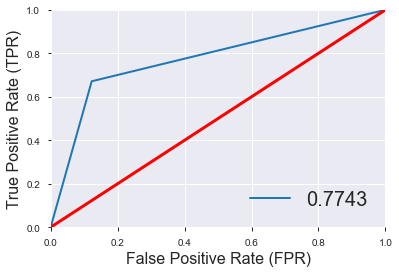

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, linewidth=2, label=roc_score)
plt.plot([0, 1], [0, 1], 'r', linewidth=3)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.legend(loc='lower right', prop={'size':20})
plt.show()

### Hyperparameter Tuning

In [113]:
X_train2 = X_train.copy()
y_train2 = y_train.copy()
X_test2 = X_test.copy()
y_test2 = y_test.copy()

In [154]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
# solver = 'liblinear' is the best option for small datasets
lr_2 = LogisticRegression(solver='liblinear')

In [93]:

param2 = {  'penalty' : ['l1', 'l2'],
            'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100, 1000] }

param4 = {  'penalty' : ['l1', 'l2'],
            'C': np.arange(0.01, 1, 0.005) }

In [94]:
from sklearn.model_selection import GridSearchCV


clf2 = GridSearchCV(lr_2, param2, cv=5, verbose=True)
clf4 = GridSearchCV(lr_2, param4, cv=5, verbose=True)

In [73]:
# View best hyperparameters
print('Best Penalty:', best_clf1.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf1.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.615848211066026


In [95]:
best_clf2 = clf2.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


In [96]:
clf2.best_params_

{'C': 1, 'penalty': 'l1'}

In [97]:
best_clf4 = clf4.fit(X_train, y_train)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1980 out of 1980 | elapsed:   14.6s finished


In [98]:
clf4.best_params_

{'C': 0.595, 'penalty': 'l1'}

In [99]:
y_pred_clf2 = best_clf2.predict(X_test)
print(classification_report(y_test, y_pred_clf2))
roc_clf2 = roc_auc_score(y_test, y_pred_clf2)
print('ROC: ',roc_clf2)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       106
           1       0.80      0.67      0.73        73

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

ROC:  0.7790126647712587


In [100]:
y_pred_clf4 = best_clf4.predict(X_test)
print(classification_report(y_test, y_pred_clf4))
roc_clf4 = roc_auc_score(y_test, y_pred_clf4)
print('ROC: ',roc_clf4)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       106
           1       0.79      0.68      0.74        73

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

ROC:  0.7811449987076765


### Summary